In [1]:
import gym
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [2]:
import torch.nn as nn
class Actor(torch.nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Actor, self).__init__()
        self.fc1 = torch.nn.Linear(state_dim, 128)
        self.fc2 = torch.nn.Linear(128, 128)
        self.mean_head = torch.nn.Linear(128, action_dim)
        self.log_std_head = nn.Parameter(torch.zeros(action_dim))

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        mean = self.mean_head(x)
        log_std = self.log_std_head.expand_as(mean)
        std = torch.exp(log_std)
        dist = torch.distributions.Normal(mean, std)
        action = dist.sample()
        log_prob = dist.log_prob(action).sum(dim=-1, keepdim=True)
        return mean, std, log_prob

In [4]:
torch.random.manual_seed(0)
np.random.seed(0)
x = torch.randn(1, 64)
x = x.squeeze(0)
x

tensor([-1.1258, -1.1524, -0.2506, -0.4339,  0.8487,  0.6920, -0.3160, -2.1152,
         0.3223, -1.2633,  0.3500,  0.3081,  0.1198,  1.2377,  1.1168, -0.2473,
        -1.3527, -1.6959,  0.5667,  0.7935,  0.5988, -1.5551, -0.3414,  1.8530,
         0.7502, -0.5855, -0.1734,  0.1835,  1.3894,  1.5863,  0.9463, -0.8437,
        -0.6136,  0.0316, -0.4927,  0.2484,  0.4397,  0.1124,  0.6408,  0.4412,
        -0.1023,  0.7924, -0.2897,  0.0525,  0.5229,  2.3022, -1.4689, -1.5867,
        -0.6731,  0.8728,  1.0554,  0.1778, -0.2303, -0.3918,  0.5433, -0.3952,
        -0.4462,  0.7440,  1.5210,  3.4105, -1.5312, -1.2341,  1.8197, -0.5515])

In [ ]:
import torch
x = torch.randn(7,3)
# y = torch.randn_like(x)
y = x.flatten()
z = x.view(-1)
x,y,z

(tensor([[ 0.9113,  0.3584,  0.1122],
         [-1.5674,  0.4209,  0.1364],
         [ 0.9644, -0.4521,  0.6445],
         [-1.6214,  0.9343, -0.3071],
         [-1.3796, -0.4240, -0.6357],
         [ 1.4581,  0.6543,  2.0514],
         [ 0.8336,  1.2594,  1.0318]]),
 tensor([ 0.9113,  0.3584,  0.1122, -1.5674,  0.4209,  0.1364,  0.9644, -0.4521,
          0.6445, -1.6214,  0.9343, -0.3071, -1.3796, -0.4240, -0.6357,  1.4581,
          0.6543,  2.0514,  0.8336,  1.2594,  1.0318]),
 tensor([ 0.9113,  0.3584,  0.1122, -1.5674,  0.4209,  0.1364,  0.9644, -0.4521,
          0.6445, -1.6214,  0.9343, -0.3071, -1.3796, -0.4240, -0.6357,  1.4581,
          0.6543,  2.0514,  0.8336,  1.2594,  1.0318]))

In [15]:
import torch
import numpy as np
x = np.array([[1,2,3],[4,5,6]], dtype=np.float64)
z= torch.tensor(x)
y = torch.Tensor(x)
z, y
z.dtype, y.dtype

(torch.float64, torch.float32)

In [18]:
import numpy as np
import torch

obs = np.random.rand(64).astype(np.float64)  # numpy 默认就是 float64，但最好显式指定
t1 = torch.Tensor(obs)  # 跟随 numpy 的 dtype → float64
t2 = torch.tensor(obs, dtype=torch.float32)  # 强制 cast → float32

print("t1:", t1.dtype, t1.shape)
print("t2:", t2.dtype, t2.shape)
print("diff:", (t1.float() - t2).abs().max().item())

t1: torch.float32 torch.Size([64])
t2: torch.float32 torch.Size([64])
diff: 0.0


In [8]:
import torch
import torch.nn.functional as F
torch.random.manual_seed(0)
x = torch.randn(7,1)
z = torch.randn(7,1)
y = z.flatten()
k = x.flatten()
loss = F.mse_loss(y, x).mean()
loss1 = F.mse_loss(k, y).mean()
x,y,k,z,loss,loss1
# 手动广播 y 和 x
# y_broadcast = y.unsqueeze(-1).expand(7, 1)  # (7,) → (1,7) → (7,7)
x_broadcast = x.expand(7, 7)              # (7,1) → (7,7)
# x_flatten = x.flatten()
# print("y_broadcast shape:", y_broadcast.shape)
print("x_broadcast:", x_broadcast)

# # 对比 loss
# manual_loss = ((y - x_flatten) ** 2).mean()
# print("manual_loss:", manual_loss.item())
# print("original_loss:", loss.item())


x_broadcast: tensor([[ 1.5410,  1.5410,  1.5410,  1.5410,  1.5410,  1.5410,  1.5410],
        [-0.2934, -0.2934, -0.2934, -0.2934, -0.2934, -0.2934, -0.2934],
        [-2.1788, -2.1788, -2.1788, -2.1788, -2.1788, -2.1788, -2.1788],
        [ 0.5684,  0.5684,  0.5684,  0.5684,  0.5684,  0.5684,  0.5684],
        [-1.0845, -1.0845, -1.0845, -1.0845, -1.0845, -1.0845, -1.0845],
        [-1.3986, -1.3986, -1.3986, -1.3986, -1.3986, -1.3986, -1.3986],
        [ 0.4033,  0.4033,  0.4033,  0.4033,  0.4033,  0.4033,  0.4033]])


/tmp/ipykernel_2128/1230463375.py:8: UserWarning: Using a target size (torch.Size([7, 1])) that is different to the input size (torch.Size([7])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(y, x).mean()


In [3]:
import numpy as np
x = np.prod(12)
x

12

In [5]:
actor = Actor(64,7)
mean, std, log_pi = actor(x)
mean, std, log_pi
mean.detach().cpu().numpy()

array([-0.01656833, -0.09915563,  0.0901608 , -0.10631421,  0.01338686,
       -0.10038403, -0.02053976], dtype=float32)

In [6]:
class REINFORCE:
    def __init__(self, state_dim, hidden_dim, action_dim, learning_rate, gamma,
                 device):
        self.policy_net = Actor(state_dim, action_dim).to(device)
        self.optimizer = torch.optim.Adam(self.policy_net.parameters(),
                                          lr=learning_rate)  # Adam
        self.gamma = gamma  # 折扣因子
        self.device = device
        self.action_dim = action_dim
        self.hidden_dim = hidden_dim
        self.state_dim = state_dim
    def take_action_and_prob(self, state):
        state = torch.tensor([state], dtype=torch.float).squeeze(0).to(self.device)
        mean, std, log_pi = self.policy_net(state)
        dist = torch.distributions.Normal(mean, std)
        action = dist.sample()
        return action.detach().cpu().numpy(), log_pi

    def update(self, transition_dict):
        reward_list = transition_dict['rewards']
        state_list = transition_dict['states']
        action_list = transition_dict['actions'] 
        G = 0
        self.optimizer.zero_grad()
        for i in reversed(range(len(reward_list))):
            reward = reward_list[i]
            state = torch.tensor([state_list[i]])
            action = torch.tensor(action_list[i])
            G = self.gamma * G + reward
            mean, std, log_pi = self.policy_net(state.float().to(self.device))
            loss = -log_pi * G
            loss.backward()
        self.optimizer.step()

In [13]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device(
    "cpu")
env_name = "Pendulum-v1"
env = gym.make(env_name)
env.seed(0)
torch.manual_seed(0)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
state = env.reset()
state = torch.tensor([state], dtype=torch.float).to(device)
state = state.squeeze(0)
state
action = env.action_space.sample()
next_state, reward, done, _ = env.step(action)
next_state

array([ 0.65572274,  0.7550018 , -0.09797606], dtype=float32)

In [ ]:
learning_rate = 1e-3
num_episodes = 10000
hidden_dim = 128
gamma = 0.98
device = torch.device("cuda") if torch.cuda.is_available() else torch.device(
    "cpu")

env_name = "Pendulum-v1"
env = gym.make(env_name)
env.seed(0)
torch.manual_seed(0)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
agent = REINFORCE(state_dim, hidden_dim, action_dim, learning_rate, gamma,
                  device)

return_list = []
for i in range(10):
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes / 10)):
            episode_return = 0
            transition_dict = {
                'states': [],
                'actions': [],
                'next_states': [],
                'rewards': [],
                'dones': []
            }
            state = env.reset()
            state
            done = False
            while not done:
                action, log_pi = agent.take_action_and_prob(state)
                next_state, reward, done, _ = env.step(action)
                transition_dict['states'].append(state)
                transition_dict['actions'].append(action)
                transition_dict['next_states'].append(next_state)
                transition_dict['rewards'].append(reward)
                transition_dict['dones'].append(done)
                state = next_state
                episode_return += reward
            return_list.append(episode_return)
            agent.update(transition_dict)
            if (i_episode + 1) % 10 == 0:
                pbar.set_postfix({
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return':
                    '%.3f' % np.mean(return_list[-10:])
                })
            pbar.update(1)

Iteration 9: 100%|██████████| 100/100 [01:16<00:00,  1.31it/s, episode=1000, return=-1656.535]


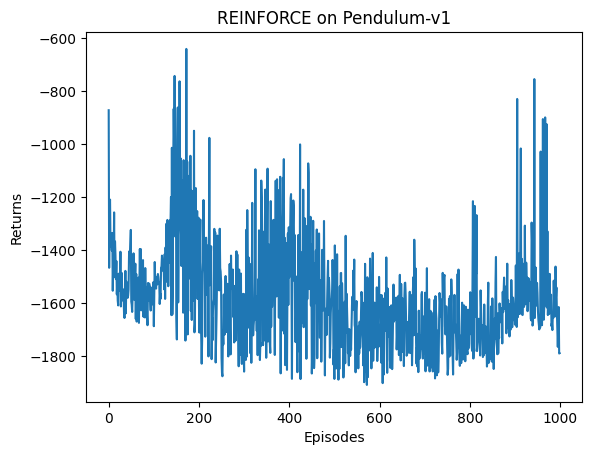

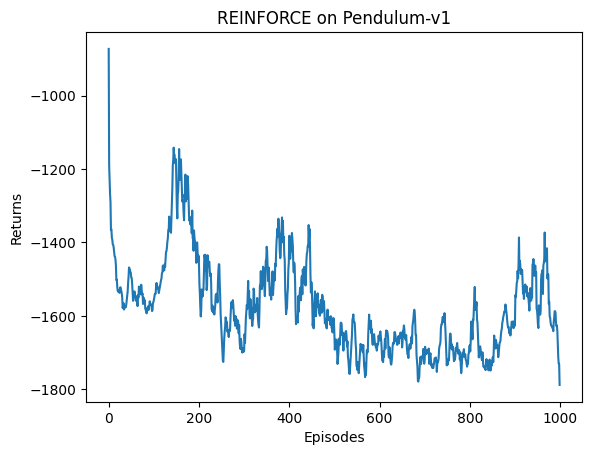

In [10]:
import rl_utils
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('REINFORCE on {}'.format(env_name))
plt.show()

mv_return = rl_utils.moving_average(return_list, 9)
plt.plot(episodes_list, mv_return)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('REINFORCE on {}'.format(env_name))
plt.show()